## Getting a time series for Hospitalizations


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from datetime import datetime




In [2]:
h_df = pd.read_csv('../Data/hospitalizations.csv', index_col='DATE_OF_INTEREST', parse_dates=True)
t_df = pd.read_csv('../Data/NewYork_traffic.csv', index_col='Date', parse_dates= True)
#b_df = pd.read_csv('../Data/buses_ridership.csv', index_col='Date', parse_dates=True)
#s_df = pd.read_csv('../Data/Subway_ridership.csv', index_col='Date', parse_dates=True )

In [3]:
h_df.head(1)

,Cases,Hospitalizations,Deaths
DATE_OF_INTEREST,,,
2020-02-29,1,11,0


In [4]:
def diff_series(df, col, lag):
    """Function that las the value of a colun by a particular amount"""
    for i in range(0,lag,1):
        new_col = col+f'_lag_{i+1}'
        df[new_col] = df[col].shift(i+1)
    

In [5]:
h_df['log_hosp'] = np.log(h_df['Hospitalizations'])

In [6]:
h_df.head(2)

,Cases,Hospitalizations,Deaths,log_hosp
DATE_OF_INTEREST,,,,
2020-02-29,1,11,0,2.397895
2020-03-01,1,4,0,1.386294


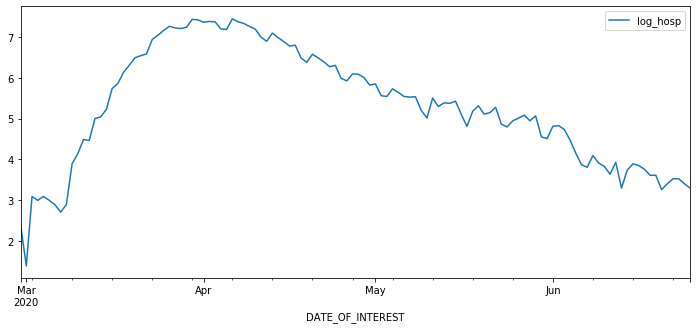

In [7]:
h_df[['log_hosp']].plot(figsize=(12,5));

Rolling 

In [8]:
h_df['hosp_rolling'] = h_df['Hospitalizations'].rolling(window=3).mean()
h_df['hosp_rolling_7'] = h_df['Hospitalizations'].rolling(window=7).mean()

h_df['log_hosp_rolling'] = h_df['log_hosp'].rolling(window=3).mean()
h_df['log_hosp_rolling_7'] = h_df['log_hosp'].rolling(window=7).mean()
#rates
h_df['hosp_rate'] = h_df['log_hosp_rolling']/h_df['log_hosp_rolling_7'] 
h_df['log_hosp_rate'] = np.log(h_df['hosp_rolling'])/np.log(h_df['hosp_rolling_7'])

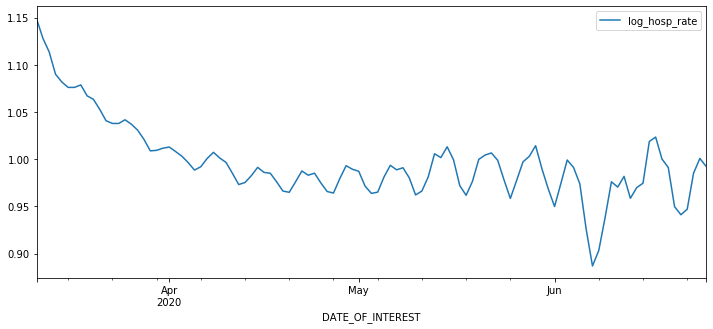

In [9]:
h_df[['log_hosp_rate']][11:].plot(figsize=(12,5));

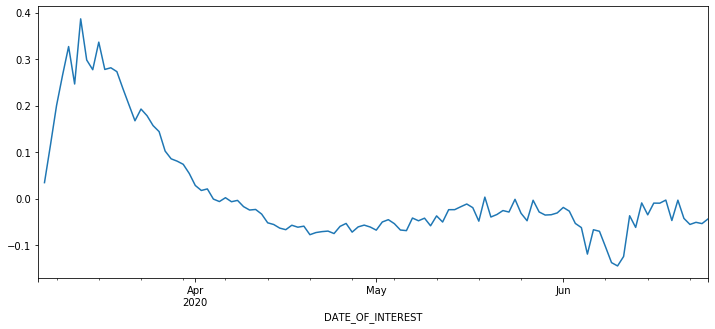

In [81]:
h_df['hosp_change'] =h_df[['hosp_rolling_7']].pct_change()
h_df['hosp_change'][6:].plot(figsize=(12,5));

In [42]:
h_df.head(50)

,Cases,Hospitalizations,Deaths,log_hosp,hosp_rolling,hosp_rolling_7,log_hosp_rolling,log_hosp_rolling_7,hosp_rate,log_hosp_rate,hosp_change
DATE_OF_INTEREST,,,,,,,,,,,
2020-02-29,1,11,0,2.397895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,1,4,0,1.386294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02,0,22,0,3.091042,12.333333,NaN,2.291744,NaN,NaN,NaN,NaN
2020-03-03,2,20,0,2.995732,15.333333,NaN,2.491023,NaN,NaN,NaN,NaN
2020-03-04,5,22,0,3.091042,21.333333,NaN,3.059272,NaN,NaN,NaN,NaN
2020-03-05,3,20,0,2.995732,20.666667,NaN,3.027502,NaN,NaN,NaN,NaN
2020-03-06,8,18,0,2.890372,20.000000,16.714286,2.992382,2.692587,1.111341,1.063726,NaN
2020-03-07,7,15,0,2.708050,17.666667,17.285714,2.864718,2.736895,1.046704,1.007649,0.034188
2020-03-08,21,18,0,2.890372,17.000000,19.285714,2.829598,2.951763,0.958613,0.957372,0.115702


# Social distance - Traffic index

In [10]:
t_df.head(20)

,trafic_index,SociaD_index,first week of February
Date,,,
2020-02-29,19,1.055556,18
2020-03-01,15,1.153846,13
2020-03-02,30,1.071429,28
2020-03-03,36,1.285714,28
2020-03-04,32,1.142857,28
2020-03-05,34,0.918919,37
2020-03-06,40,1.176471,34
2020-03-07,19,1.055556,18
2020-03-08,13,1.000000,13


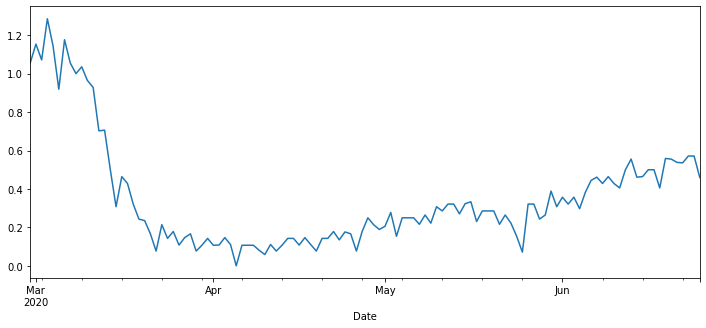

In [17]:
t_df['SociaD_index'].plot(figsize=(12,5));

In [19]:
t_df['SociaD_index_rolling'] = t_df['SociaD_index'].rolling(window=7).mean()

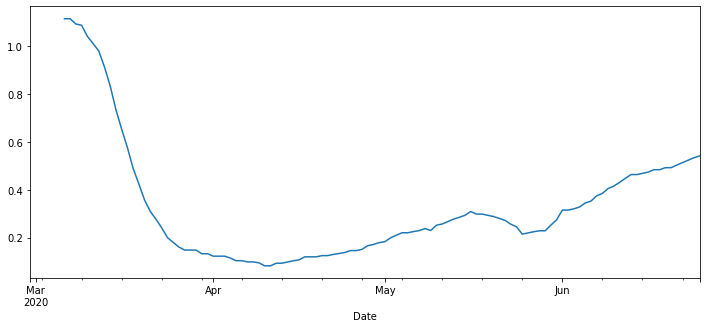

In [20]:
t_df['SociaD_index_rolling'].plot(figsize=(12,5));

In [21]:
diff_series(t_df, 'SociaD_index_rolling', 30)

In [27]:
t_df.head(15)

,trafic_index,SociaD_index,first week of February,SociaD_index_rolling,SociaD_index_rolling_lag_1,SociaD_index_rolling_lag_2,SociaD_index_rolling_lag_3,SociaD_index_rolling_lag_4,SociaD_index_rolling_lag_5,SociaD_index_rolling_lag_6,...,SociaD_index_rolling_lag_21,SociaD_index_rolling_lag_22,SociaD_index_rolling_lag_23,SociaD_index_rolling_lag_24,SociaD_index_rolling_lag_25,SociaD_index_rolling_lag_26,SociaD_index_rolling_lag_27,SociaD_index_rolling_lag_28,SociaD_index_rolling_lag_29,SociaD_index_rolling_lag_30
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-29,19,1.055556,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,15,1.153846,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02,30,1.071429,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,36,1.285714,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,32,1.142857,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,34,0.918919,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,40,1.176471,34,1.114970,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-07,19,1.055556,18,1.114970,1.114970,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-08,13,1.000000,13,1.092992,1.114970,1.114970,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
X = sm.add_constant(t_df['SociaD_index_rolling_lag_14'][20:])
model = sm.OLS(h_df['hosp_change'][20:],X)
results = model.fit()

In [60]:
results.rsquared

0.8080984806474966

In [63]:
def lag_finder(n):
    rsquared =[]
    for i in range(1,n):
        X = sm.add_constant(t_df[f'SociaD_index_rolling_lag_{i}'][6+i:])
        model = sm.OLS(h_df['hosp_change'][6+i:],X)
        results = model.fit()
        rsquared.append(results.rsquared)
    return rsquared
        

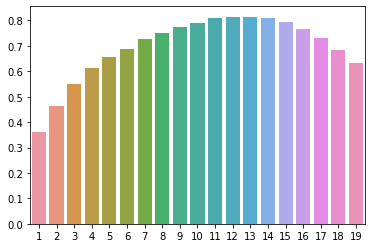

In [74]:
rsqr = lag_finder(20)
lag = list(range(1,20))
ax = sns.barplot(x=lag, y=rsqr)

/Users/flatironschool/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


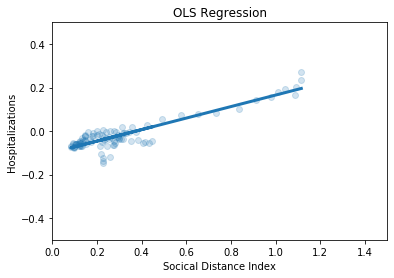

In [86]:
X = sm.add_constant(t_df['SociaD_index_rolling_lag_13'][19:])
model = sm.OLS(h_df['hosp_change'][19:],X)
results = model.fit()

plt.scatter(t_df['SociaD_index_rolling_lag_13'],h_df['hosp_change'],alpha=0.2)
y_predict = results.params[0] + results.params[1]*t_df['SociaD_index_rolling_lag_13']
plt.plot(t_df['SociaD_index_rolling_lag_13'],y_predict, linewidth=3)
plt.xlim(0,1.5)
plt.ylim(-0.5,0.5)
plt.xlabel('Socical Distance Index')
plt.ylabel('Hospitalizations')
plt.title('OLS Regression');

In [89]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            hosp_change   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     426.6
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           2.74e-37
Time:                        08:58:21   Log-Likelihood:                 198.88
No. Observations:                  99   AIC:                            -393.8
Df Residuals:                      97   BIC:                            -388.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [ ]:
adf_test(h_df['log_hosp'].dropna())

In [ ]:
adf_test(t_df['SociaD_index'])

In [ ]:
X = sm.add_constant(t_df['SociaD_index'][11:])
model = sm.OLS(h_df['log_hosp_lag_11'][11:],X)
results = model.fit()